# Feature Engineering and Classification

## Explore data

In [101]:
import pandas as pd
import utils
directory = r'C:\Users\s3628075\Study\Fujisaki\DataBase\enterface\All/'
data = pd.DataFrame(utils.load_obj(directory+'fuj_params_data.pkl'))
print 'Data loaded successfully'
print data.head(10)

Data loaded successfully
       name          Fb       a     Ap0     Ap1  Ap2    T0p0    T0p1  T0p2  \
0  s17_an_2  118.649590  2.1579  0.0211  0.3876  NaN  0.5800  2.7733   NaN   
1  s17_an_3  141.798721  1.6316  0.1423     NaN  NaN  0.1500     NaN   NaN   
2  s28_ha_2  256.279205  1.3158  0.5188     NaN  NaN -0.1400     NaN   NaN   
3  s28_ha_3  154.309219  2.0526  0.7094     NaN  NaN -0.1700     NaN   NaN   
4  s28_ha_4  116.936386  2.8947  0.6718     NaN  NaN  0.1345     NaN   NaN   
5  s28_ha_5  180.134308  3.0000  0.5046     NaN  NaN  0.2167     NaN   NaN   
6  s17_an_4  129.622879  2.7895  0.0055  0.2703  NaN -0.3000  1.1858   NaN   
7  s17_an_5  124.891998  3.0000  0.0000  0.1536  NaN -0.0600  0.9396   NaN   
8  s31_ha_2  203.911011  3.0000  0.1322  0.0586  NaN  0.6867  2.8767   NaN   
9  s31_ha_3  186.932251  2.7895  0.0809  0.0938  NaN  1.2300  2.6715   NaN   

      Aa0  ...      T2a2    T2a3    T2a4    T2a5    T2a6    T2a7  T2a8  T2a9  \
0  0.1942  ...    2.1700  2.5275  2.

As we can see our data is significantly sparse (a lot of missing data)

## Filter data (throw away non-significant features)

In [102]:
import stat_utils as st
anova = st.calc_anova(directory, verbose=False)

import operator
import matplotlib.pyplot as plt
params, anova_res = zip(*sorted(anova.items(), key=operator.itemgetter(1)))

thresh = 0.05
# take those parameters with p-values less than thresh=0.05
Idx = [ind for ind in range(len(anova_res)) if anova_res[ind] < thresh]
selected_features = [params[i] for i in Idx]
print 'Selected Features: ', selected_features

filtered_data = data[selected_features+['name']]
print '\nFiltered Data:\n\n',filtered_data.head(10)

Selected Features:  ['Aa0', 'Aa2', 'Aa3', 'Aa1', 'Aa4', 'Fb', 'Aa5', 'Ap0', 'T2a3', 'T1a3', 'T2a2', 'T2a4', 'T2a6', 'T2a0']

Filtered Data:

      Aa0     Aa2     Aa3     Aa1     Aa4          Fb     Aa5     Ap0    T2a3  \
0  0.1942 -0.0562  0.1745  0.3262  0.2202  118.649590  0.2822  0.0211  2.5275   
1  0.3880  0.3880 -0.1187  0.1876  0.2485  141.798721     NaN  0.1423  1.9475   
2  0.1985  0.1985  0.3110  0.1753  0.2343  256.279205     NaN  0.5188  1.7675   
3  0.0813  0.5476  0.5281  0.5925  0.3185  154.309219     NaN  0.7094  1.4146   
4  0.3225  0.6153     NaN  0.3465     NaN  116.936386     NaN  0.6718     NaN   
5  0.3530  0.3654     NaN  0.6187     NaN  180.134308     NaN  0.5046     NaN   
6  0.3514  0.0711  0.0801  0.3513  0.2907  129.622879  0.6366  0.0055  1.8669   
7  0.3245  0.1576  0.1698  0.2426  0.3171  124.891998  0.2355  0.0000  1.3650   
8  0.1543  0.2398  0.0892  0.1358  0.1765  203.911011  0.0678  0.1322  2.7475   
9  0.0360  0.1060  0.2097 -0.1156  0.1536  186.93

## Explore sparsness of filtered data

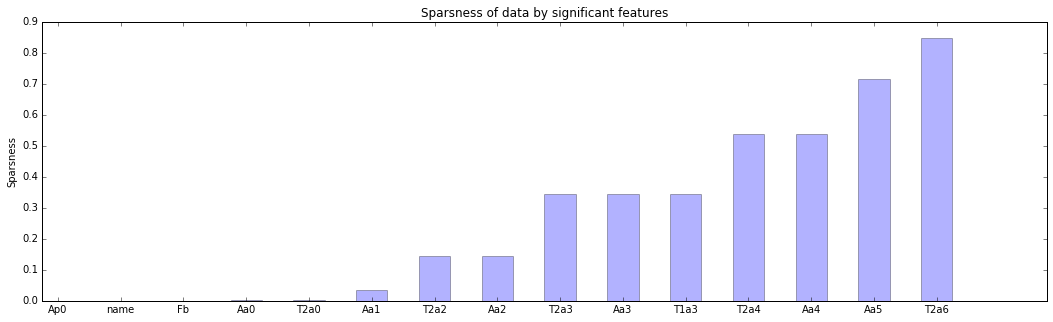

In [103]:
import pandas as pd
import operator
import numpy as np
%matplotlib inline
nan_fraction = {}
for c in list(filtered_data):
    nan_idx = pd.isnull(data[c])
    nan_fraction[c]=float(sum(nan_idx))/len(filtered_data)
params, fractions = zip(*sorted(nan_fraction.items(), key=operator.itemgetter(1)))
# take first 30 parameters
split = len(list(filtered_data))
left = np.arange(split)
fig, ax = plt.subplots(figsize=(18,5))
width = 0.5
ax.bar(left, fractions[:split], width, alpha = 0.3)
# add some text for labels, title and axes ticks
ax.set_ylabel('Sparsness')
ax.set_title('Sparsness of data by significant features')
ax.set_xticks(left + width / 2)
ax.set_xticklabels(params[:split])
plt.show()

## Handling missing data

In [104]:
data = filtered_data
names = data.pop('name')

### Removing feature/data trade-off

In [108]:
filtered_data = data
# Goal is to get rid of missing data by removing rows or cols
# Still want to maximize amount of data left
# iterate through features and find the loss of removing column vs removing all rows where this feature is missed 
for c in list(filtered_data):
    nan_idx = pd.isnull(filtered_data[c])
    loss_col = sum(pd.notnull(filtered_data[c]))
    if loss_col == len(filtered_data):
        continue
#   calc loss of removing all rows with missing data in this feature
    loss_rows = sum(sum(pd.notnull(filtered_data[nan_idx].values)))
    if loss_col < loss_rows:
        del filtered_data[c]
    else:
        filtered_data = filtered_data[filtered_data[c].notnull()]
print 'Num of data points left: ',len(filtered_data)
print 'Features left: ', list(filtered_data)
print filtered_data.head(10)
i, _ = zip(*filtered_data.iterrows())
filtered_names = [names[idx] for idx in i]

Num of data points left:  1161
Features left:  ['Aa0', 'Aa2', 'Aa3', 'Aa1', 'Aa4', 'Fb', 'Aa5', 'Ap0', 'T2a3', 'T1a3', 'T2a2', 'T2a4', 'T2a6', 'T2a0']
      Aa0     Aa2       Aa3     Aa1       Aa4          Fb       Aa5     Ap0  \
0  0.1942 -0.0562  0.174500  0.3262  0.220200  118.649590  0.282200  0.0211   
1  0.3880  0.3880 -0.118700  0.1876  0.248500  141.798721  0.283376  0.1423   
2  0.1985  0.1985  0.311000  0.1753  0.234300  256.279205  0.283376  0.5188   
3  0.0813  0.5476  0.528100  0.5925  0.318500  154.309219  0.283376  0.7094   
4  0.3225  0.6153  0.654608  0.3465  0.463394  116.936386  0.283376  0.6718   
5  0.3530  0.3654  0.654608  0.6187  0.463394  180.134308  0.283376  0.5046   
6  0.3514  0.0711  0.080100  0.3513  0.290700  129.622879  0.636600  0.0055   
7  0.3245  0.1576  0.169800  0.2426  0.317100  124.891998  0.235500  0.0000   
8  0.1543  0.2398  0.089200  0.1358  0.176500  203.911011  0.067800  0.1322   
9  0.0360  0.1060  0.209700 -0.1156  0.153600  186.932251  

### Imputation of missing data with mean values

In [107]:
imp_data = data
for c in list(imp_data):
    
    nan_idx = pd.isnull(imp_data[c])
    m = imp_data[c].notnull().mean()
    imp_data[c][nan_idx]=m
print imp_data.head(10)
imp_names = names

      Aa0     Aa2       Aa3     Aa1       Aa4          Fb       Aa5     Ap0  \
0  0.1942 -0.0562  0.174500  0.3262  0.220200  118.649590  0.282200  0.0211   
1  0.3880  0.3880 -0.118700  0.1876  0.248500  141.798721  0.283376  0.1423   
2  0.1985  0.1985  0.311000  0.1753  0.234300  256.279205  0.283376  0.5188   
3  0.0813  0.5476  0.528100  0.5925  0.318500  154.309219  0.283376  0.7094   
4  0.3225  0.6153  0.654608  0.3465  0.463394  116.936386  0.283376  0.6718   
5  0.3530  0.3654  0.654608  0.6187  0.463394  180.134308  0.283376  0.5046   
6  0.3514  0.0711  0.080100  0.3513  0.290700  129.622879  0.636600  0.0055   
7  0.3245  0.1576  0.169800  0.2426  0.317100  124.891998  0.235500  0.0000   
8  0.1543  0.2398  0.089200  0.1358  0.176500  203.911011  0.067800  0.1322   
9  0.0360  0.1060  0.209700 -0.1156  0.153600  186.932251  0.283376  0.0809   

       T2a3      T1a3    T2a2      T2a4      T2a6    T2a0  
0  2.527500  2.367700  2.1700  2.775000  3.832500  1.4211  
1  1.94750

## Classification